In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Airplane_Crashes.csv")

In [3]:

# Display the first few rows
print(df.head())


         Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  09/07/1909    NaN             Juvisy-sur-Orge, France   
2  07/12/1912  06:30           Atlantic City, New Jersey   
3  08/06/1913    NaN  Victoria, British Columbia, Canada   
4  09/09/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1          SC1   NaN    

In [4]:
# View the dataset summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4192 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

In [5]:
# View basic statistics of numeric columns
print(df.describe())

            Aboard  Aboard Passangers  Aboard Crew   Fatalities  \
count  4949.000000        4738.000000  4741.000000  4959.000000   
mean     31.088301          26.898691     4.479646    22.338173   
std      45.438282          44.010591     3.489021    35.026176   
min       0.000000           0.000000     0.000000     0.000000   
25%       7.000000           3.000000     2.000000     4.000000   
50%      16.000000          12.000000     4.000000    11.000000   
75%      35.000000          30.000000     6.000000    25.000000   
max     644.000000         614.000000    61.000000   583.000000   

       Fatalities Passangers  Fatalities Crew       Ground  
count            4725.000000      4726.000000  4926.000000  
mean               19.017566         3.579348     1.728177  
std                34.114849         3.170223    55.708966  
min                 0.000000         0.000000     0.000000  
25%                 1.000000         2.000000     0.000000  
50%                 8.000000  

In [6]:
# Display unique operators
print(df['Operator'].unique())

['Military - U.S. Army' nan 'Military - U.S. Navy' ...
 'Archipelagos Service Aereos' 'TVPX Aircraft Solutions'
 'Aeroflot Russian International Airlines']


In [7]:
# Count crashes by operator
print(df['Operator'].value_counts())

Operator
Aeroflot                                   255
Military - U.S. Air Force                  140
Air France                                  72
Deutsche Lufthansa                          63
United Air Lines                            44
                                          ... 
Houston Metro Airlines                       1
Wenela Air Services                          1
Sierra Pacific Airlines                      1
Pathet Lao Airlines                          1
Aeroflot Russian International Airlines      1
Name: count, Length: 2242, dtype: int64


In [8]:
# Check for missing values
print(df.isnull().sum())

Date                        0
Time                     1510
Location                    4
Operator                   10
Flight #                 3652
Route                     775
AC Type                    15
Registration              273
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     41
Summary                    64
dtype: int64


In [9]:
# Replace missing values in numeric columns with 0
numeric_cols = ['Aboard', 'Fatalities', 'Ground']
df[numeric_cols] = df[numeric_cols].fillna(0)

In [10]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [11]:
# Drop rows where 'Date' could not be parsed
df = df.dropna(subset=['Date'])

In [12]:
# Add a new column for survivors
df['Survivors'] = df['Aboard'] - df['Fatalities']

In [13]:
# Filter data for crashes with more than 10 fatalities
high_fatalities = df[df['Fatalities'] > 10]
print(high_fatalities)

           Date   Time                       Location  \
4    1913-09-09  18:30             Over the North Sea   
5    1913-10-17  10:30     Near Johannisthal, Germany   
6    1915-03-05  01:00                Tienen, Belgium   
7    1915-09-03  15:20          Off Cuxhaven, Germany   
8    1916-07-28    NaN          Near Jambol, Bulgeria   
...         ...    ...                            ...   
4960 2019-03-09  10:40  Vereda La Bendicion, Colombia   
4961 2019-03-10  08:44             Bishoftu, Ethiopia   
4963 2019-05-05  18:30          Near Monclava, Mexico   
4964 2019-05-05  18:30                 Moscow, Russia   
4965 2019-06-03  13:00               Near Lipo, India   

                                     Operator Flight #  \
4                      Military - German Navy      NaN   
5                      Military - German Navy      NaN   
6                      Military - German Navy      NaN   
7                      Military - German Navy      NaN   
8                      Mi

In [14]:
# Total fatalities by operator
fatalities_by_operator = df.groupby('Operator')['Fatalities'].sum()
print(fatalities_by_operator)

Operator
\tAerolineas Flecha Austral - ALFA     4.0
\tAmazonavesAir Taxi                   7.0
\tCHC Helikopter Service              13.0
\tLoide Aéreo Nacional                10.0
\tMilitary - Tajik National Guard     28.0
                                      ... 
Zantop Air Transport                  10.0
Zantop International Airlines          4.0
de Havilland Air Service               4.0
de Havilland Dove                      6.0
èkoda (India) Ltd                      3.0
Name: Fatalities, Length: 2242, dtype: float64


In [15]:
# Crashes per year
df['Year'] = df['Date'].dt.year
crashes_per_year = df['Year'].value_counts().sort_index()
print(crashes_per_year)

Year
1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2015    18
2016    23
2017    15
2018    16
2019     9
Name: count, Length: 109, dtype: int64


In [16]:
# Crashes per year
df['Year'] = df['Date'].dt.year
crashes_per_year = df['Year'].value_counts().sort_index()
print(crashes_per_year)

Year
1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2015    18
2016    23
2017    15
2018    16
2019     9
Name: count, Length: 109, dtype: int64


In [17]:
# Filter top 5 operators with the most fatalities
top_operators = fatalities_by_operator.sort_values(ascending=False).head(5)

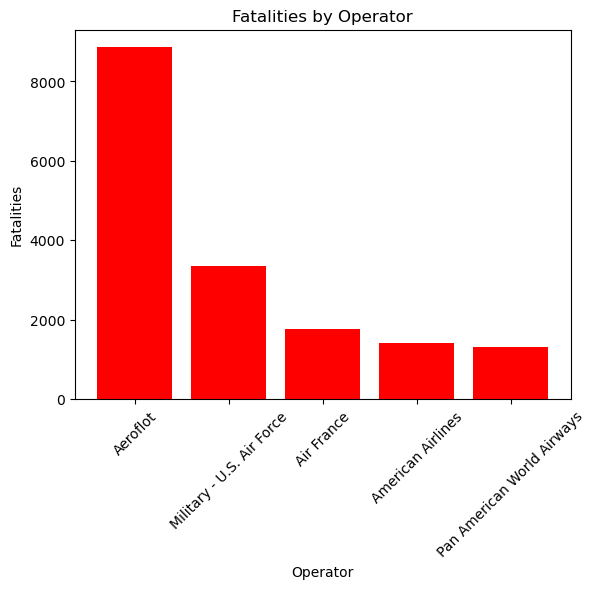

In [18]:
# Plot
plt.bar(top_operators.index, top_operators.values, color='red')
plt.xlabel('Operator')
plt.ylabel('Fatalities')
plt.title('Fatalities by Operator')
plt.xticks(rotation=45)
plt.show()

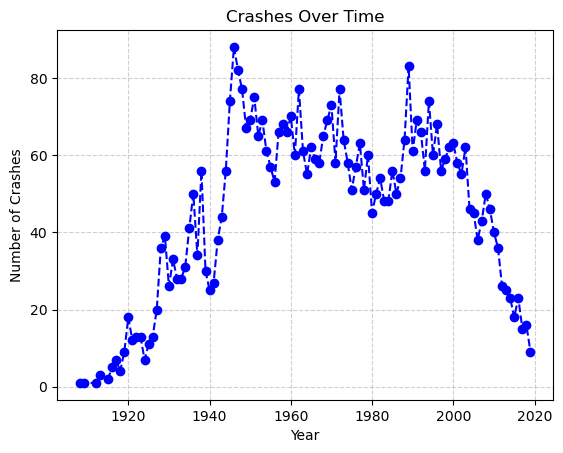

In [19]:
# Plot crashes over time
plt.plot(crashes_per_year.index, crashes_per_year.values, marker='o', linestyle='--', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Crashes Over Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


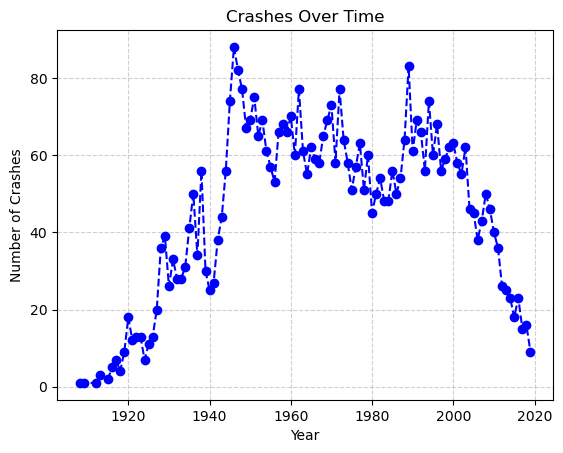

In [20]:
# Plot crashes over time
plt.plot(crashes_per_year.index, crashes_per_year.values, marker='o', linestyle='--', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Crashes Over Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


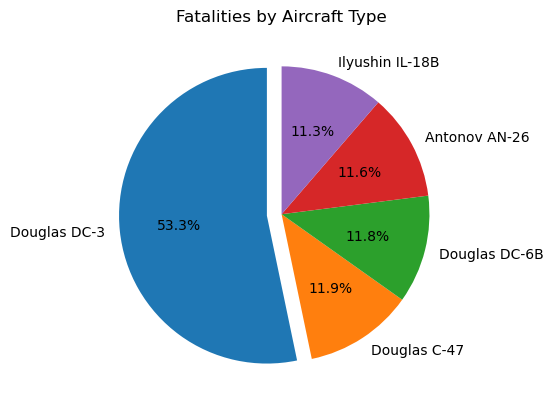

In [21]:
# Group fatalities by aircraft type
fatalities_by_type = df.groupby('AC Type')['Fatalities'].sum()

# Filter top 5 types
top_types = fatalities_by_type.sort_values(ascending=False).head(5)

# Plot
plt.pie(top_types.values, labels=top_types.index, autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0, 0, 0))
plt.title('Fatalities by Aircraft Type')
plt.show()
